abalone 데이터를 활용해 DNN, CNN, LSTM 알고리즘으로 분류해보자.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/abalone.csv')
df.head()

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Before regression
- Column importance
- Check null

In [5]:
df = df.drop(['id'], axis=1)
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [6]:
'''
    Sex: 성별
    Length: 길이
    Diameter: 직경
    Height: 높이
    Whole_weight: 전체 무게
    Shucked_weight: 껍질 제거 후 무게
    Viscera_weight: 내장 무게
    Shell_weight: 껍질 무게
    Rings: 결과 나이(고리 수)
'''

'\n    Sex: 성별\n    Length: 길이\n    Diameter: 직경\n    Height: 높이\n    Whole_weight: 전체 무게\n    Shucked_weight: 껍질 제거 후 무게\n    Viscera_weight: 내장 무게\n    Shell_weight: 껍질 무게\n    Rings: 결과 나이(고리 수)\n'

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [8]:
# 결측치 확인
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [9]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [10]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### 문자열 column Encode

In [12]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [13]:
df = pd.get_dummies(df, columns=['Sex'])

In [14]:
df.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,False,True,False


Text(0.5, 1.0, 'Abalone')

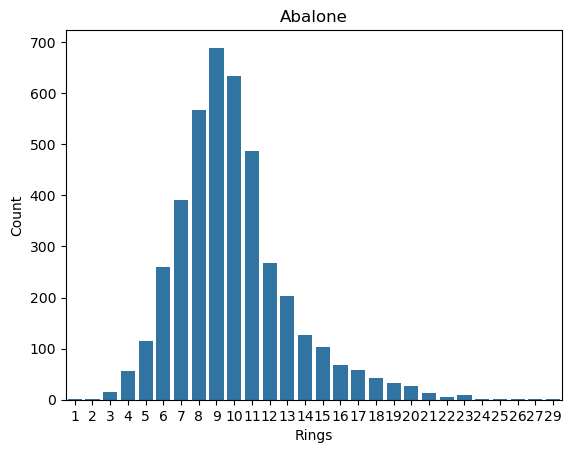

In [15]:
# label count plot
import seaborn as sns

sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Abalone")

In [16]:
def label_age_group(value):
    if 1 <= value <= 4:
        return 'young'
    elif 5 <= value <= 9:
        return 'junior'
    elif 10 <= value <= 14:
        return 'adult'
    elif 15 <= value <= 19:
        return 'senior'
    elif 20 <= value <= 29:
        return 'elderly'
    else:
        return 'unknown'

In [17]:
df['Rings'] = df['Rings'].apply(label_age_group)
df.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,senior,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,junior,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,junior,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,adult,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,junior,False,True,False


In [18]:
df['Rings'].unique()

array(['senior', 'junior', 'adult', 'elderly', 'young'], dtype=object)

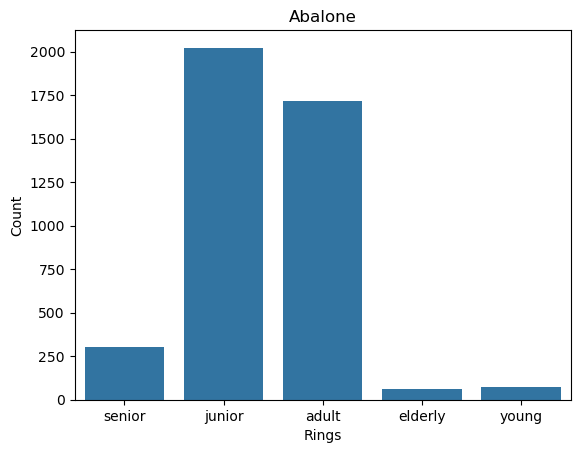

In [19]:
# label count plot
import seaborn as sns

sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Abalone")
plt.show()

Imbalanced Data이므로 train_test_split시 stratify=y를 할 것

In [21]:
X = df.drop(['Rings'], axis=1).values
y = df.iloc[:, -4].values

In [22]:
# One-Hot Encode Target variable
y = pd.get_dummies(y).values
y

array([[False, False, False,  True, False],
       [False, False,  True, False, False],
       [False, False,  True, False, False],
       ...,
       [False, False,  True, False, False],
       [ True, False, False, False, False],
       [ True, False, False, False, False]])

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

In [24]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [25]:
X_train.shape, X_test.shape

((3341, 10), (836, 10))

# Model Structure

In [154]:
from tensorflow import keras
from keras.layers import Input, Dense, Conv1D, Flatten, MaxPool1D, Dropout, LSTM

In [28]:
dense1 = Dense(64, activation='relu')
dense2 = Dense(64, activation='relu')
dense3 = Dense(5, activation='softmax')  # output layer

inputs = Input(shape=(10,))
hidden = dense1(inputs)
hidden = Dropout(0.3)(hidden)  # 첫 번째 Dropout 추가
hidden = dense2(hidden)
hidden = Dropout(0.3)(hidden)  # 두 번째 Dropout 추가
outputs = dense3(hidden)

dense = keras.Model(inputs, outputs)
dense.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,189 (20.27 KB)

 Trainable params: 5,189 (20.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5686 - loss: 1.1384 - val_accuracy: 0.6712 - val_loss: 0.8143
Epoch 2/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6477 - loss: 0.8892 - val_accuracy: 0.6726 - val_loss: 0.7465
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6510 - loss: 0.8309 - val_accuracy: 0.7070 - val_loss: 0.7170
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6560 - loss: 0.8024 - val_accuracy: 0.6831 - val_loss: 0.7068
Epoch 5/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6741 - loss: 0.7956 - val_accuracy: 0.7085 - val_loss: 0.6857
Epoch 6/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6801 - loss: 0.7675 - val_accuracy: 0.7070 - val_loss: 0.6794
Epoch 7/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6872 - loss: 0.7587 - val_accuracy: 0.7010 - val_loss: 0.6686
Epoch 8/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6866 - loss: 0.7511 - val_accuracy: 0.7100 - val_loss:

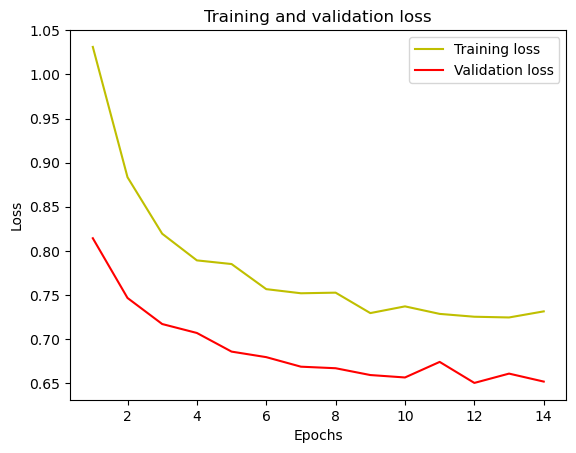

In [29]:
dense.compile(metrics=['accuracy'], loss='categorical_crossentropy')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

dnn_history = dense.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stopping_cb])

loss =dnn_history.history['loss']
val_loss =dnn_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
dense.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6920 - loss: 0.7124


[0.7085472941398621, 0.6973684430122375]

## CNN
### Sequential Data
지정된 Window size내에서 class의 **최빈값**으로 label되도록 Sequential data를 반환한다.

In [51]:
from scipy.stats import mode

def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix > len(sequences):
            break
        
        # 입력 시퀀스는 마지막 열을 제외한 값
        seq_x = sequences[i:end_ix, :-1] 
        
        # 최빈값 계산
        seq_y_mode = mode(sequences[i:end_ix, -1], axis=None)[0]  # mode 계산
        seq_y = np.atleast_1d(seq_y_mode)[0]  # 스칼라나 1D array일 경우 안전하게 인덱싱
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)


In [53]:
X = df.drop(['Rings'], axis=1).values
y = df.iloc[:, -4].values

In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [59]:
np.unique(y_train)

array([0, 1, 2, 3, 4])

In [61]:
train_set = np.c_[X_train, y_train]
test_set = np.c_[X_test, y_test]

X_train, y_train = split_sequences(train_set, 5)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 5)
print(X_test.shape, y_test.shape)   

(3337, 5, 10) (3337,)
(832, 5, 10) (832,)


In [67]:
np.unique(y_train)

array([0., 1., 2., 3.])

In [69]:
np.unique(y_test)

array([0., 2., 3.])

split_sequence에서 최빈값으로 class를 지정하였더니 train_set의 class 개수가 4개로 줄어든 것을 확인했다.
Output layer 생성시 유의하자. 뉴런 수는 5가 아닌 4가 되어야 한다.  
이제 target variable을 One-Hot encoding하고 모델을 훈련하고자 했으나 다음과 같은 문제를 발견했다.  
바로 train set과 test set의 class 개수가 달라 one hot encodng을 했을 때 그 길이가 달라진다.  
따라서 One-Hot encoding을 진행하지 않고, sparse_categorical_crossentropy를 통해 분류하도록 해보겠다.

In [72]:
# One-Hot encode target variable
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

In [141]:
# CNN
n_timestemps, n_features = X_train.shape[1], X_train.shape[2]
input_shape = (n_timestemps, n_features)

cnn = keras.Sequential([
    Input(shape=input_shape),
    Conv1D(128, kernel_size=5, activation='relu', padding='same'),
    MaxPool1D(),
    Dropout(0.3),  # 첫 번째 Dropout 레이어 추가
    
    Conv1D(64, kernel_size=5, activation='relu', padding='same'),
    MaxPool1D(),

    Flatten(),
    Dense(4, activation='softmax')
])

cnn.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_35 (Conv1D)                   │ (None, 5, 128)              │           6,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_35 (MaxPooling1D)      │ (None, 2, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 2, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_36 (Conv1D)                   │ (None, 2, 64)               │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_36 (MaxPooling1D)      │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,812 (186.77 KB)

 Trainable params: 47,812 (186.77 KB)

 Non-trainable params: 0 (0.00 B)

In [143]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

cnn_history = cnn.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stopping_cb])

Epoch 1/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6124 - loss: 0.7722 - val_accuracy: 0.6901 - val_loss: 0.6418
Epoch 2/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6577 - loss: 0.6475 - val_accuracy: 0.6901 - val_loss: 0.6137
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6772 - loss: 0.6370 - val_accuracy: 0.6901 - val_loss: 0.6250
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6766 - loss: 0.6312 - val_accuracy: 0.6961 - val_loss: 0.6120
Epoch 5/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6815 - loss: 0.6104 - val_accuracy: 0.6931 - val_loss: 0.6194
Epoch 6/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6708 - loss: 0.6304 - val_accuracy: 0.6766 - val_loss: 0.6276


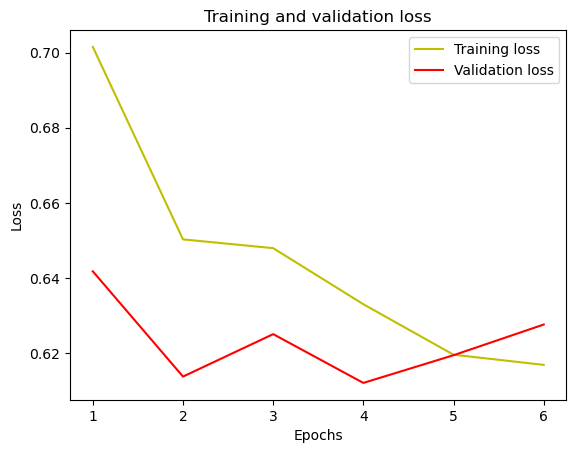

In [145]:
loss =cnn_history.history['loss']
val_loss =cnn_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [147]:
cnn.evaluate(X_test, y_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7061 - loss: 0.6206


[0.6651929020881653, 0.6754807829856873]

## LSTM

In [158]:
# LSTM Model
inputs = Input(shape=input_shape)

# LSTM Layer
lstm = LSTM(50, return_sequences=False)(inputs)

# Dense layers
dense1 = Dense(50, activation='relu')(lstm)
outputs = Dense(4, activation='softmax')(dense1)

# Model
lstm_model = keras.Model(inputs=inputs, outputs=outputs)
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm_model.summary()


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)          │ (None, 5, 10)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          12,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 4)                   │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,954 (58.41 KB)

 Trainable params: 14,954 (58.41 KB)

 Non-trainable params: 0 (0.00 B)

In [160]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

lstm_history = lstm_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stopping_cb])

Epoch 1/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5766 - loss: 1.1001 - val_accuracy: 0.7006 - val_loss: 0.6183
Epoch 2/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6646 - loss: 0.6671 - val_accuracy: 0.7036 - val_loss: 0.6086
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6693 - loss: 0.6520 - val_accuracy: 0.7006 - val_loss: 0.6073
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6796 - loss: 0.6314 - val_accuracy: 0.6976 - val_loss: 0.6011
Epoch 5/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6635 - loss: 0.6148 - val_accuracy: 0.6976 - val_loss: 0.6219
Epoch 6/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6764 - loss: 0.6142 - val_accuracy: 0.7201 - val_loss: 0.5998
Epoch 7/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6834 - loss: 0.6156 - val_accuracy: 0.6976 - val_loss: 0.5916
Epoch 8/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6713 - loss: 0.6023 - val_accuracy: 0.6961 - val_loss

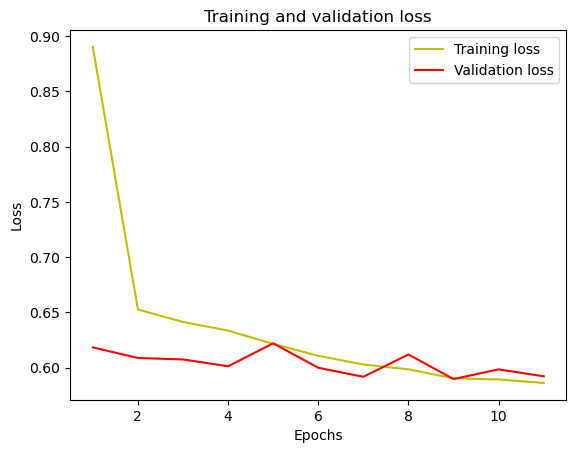

In [162]:
loss =lstm_history.history['loss']
val_loss =lstm_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [164]:
lstm_model.evaluate(X_train, y_train)

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6926 - loss: 0.5846


[0.5792063474655151, 0.7006292939186096]